## EDA and Visualisations for Coursera Course Dataset

### Introduction
This notebook is dedicated to performing Exploratory Data Analysis (EDA) and Visualisations on the Coursera Course Dataset. The primary goal of EDA is to analyze the main characteristics of the dataset, often with visual methods This helps in understanding the underlying patterns, spotting anomalies, testing hypotheses, and checking assumptions through summary statistics and graphical representations.

The dataset includes the following columns:

1. `course_title`: The title of the course.
2. `course_organization`: The organization offering the course.
3. `course_Certificate_type`: The type of certification available for the course.
4. `course_rating`: The rating of the course.
5. `course_difficulty`: The difficulty level of the course.
6. `course_students_enrolled`: The number of students enrolled in the course.

The cleaned dataset: (`coursea_data_cleaned.csv`) after data cleaning process in the `00_Data_Cleaning.ipynb` notebook will be used for this analysis.

The source and documentation for original dataset: [Kaggle: Coursera Course Dataset](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset)

### Objectives
The primary objectives of this notebook are:

1. **Data Import and Inspection**: Importing the cleaned dataset and performing initial inspections to understand its structure and contents.
2. **Descriptive Statistics**: Generating summary statistics to get an overview of the dataset.
3. **Data Visualization**: Creating various plots to visualize the distribution and relationships within the data, including:
   - Count plots for categorical variables.
   - Histograms and box plots for numerical variables.
   - Scatter plots to explore relationships between variables.
4. **Correlation Analysis**: Analyzing the correlation between the numerical variables to understand their relationship.

By the end of this notebook, the aim is to have a comprehensive understanding of the dataset, which will guide further analysis and modeling efforts.

### Data Import and Inspection

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from outliers_function import identify_outliers

df = pd.read_csv("coursea_data_cleaned.csv")
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


## Dataset Overview

In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 41.9+ KB


course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

### Descriptive Statistics

**Generating summary statistics for categorical variables**:
   - Calculating summary statistics for categorical variables to understand the count, unique values, frequency and top occurrences of each category.

In [4]:
df.describe(include="object")

,course_title,course_organization,course_Certificate_type,course_difficulty
count,891,891,891,891
unique,888,154,3,4
top,Developing Your Musicianship,University of Pennsylvania,COURSE,Beginner
freq,2,59,582,487


- There are 891 course titles with 888 unique values, indicating a high diversity in course offerings.
- There are 3 unique certificate types, with the most common being "COURSE" (582 occurrences).
- There are 4 unique difficulty levels, with "Beginner" being the most frequent (487 occurrences).


**Generating summary statistics for numerical variables**:
- Calculating summary statistics for numerical variables to get an overview of their central tendency and dispersion.

In [5]:
df.describe().round(2)

,course_rating,course_students_enrolled
count,891.00,891.00
mean,4.68,90552.08
std,0.16,181936.45
min,3.30,1500.00
25%,4.60,17500.00
50%,4.70,42000.00
75%,4.80,99500.00
max,5.00,3200000.00


- The ratings are generally high, with a small standard deviation indicating consistency in course quality.
- The number of students enrolled varies widely, with a high standard deviation indicating significant differences in course popularity.

### Course Organization Analysis

**Calculating the counts for each organization**:
- Calculating the number of courses offered by each organisation to identify the top 15 contributors.
- Creating a count plot to visualise the number of courses offered by the top 15 organisations.

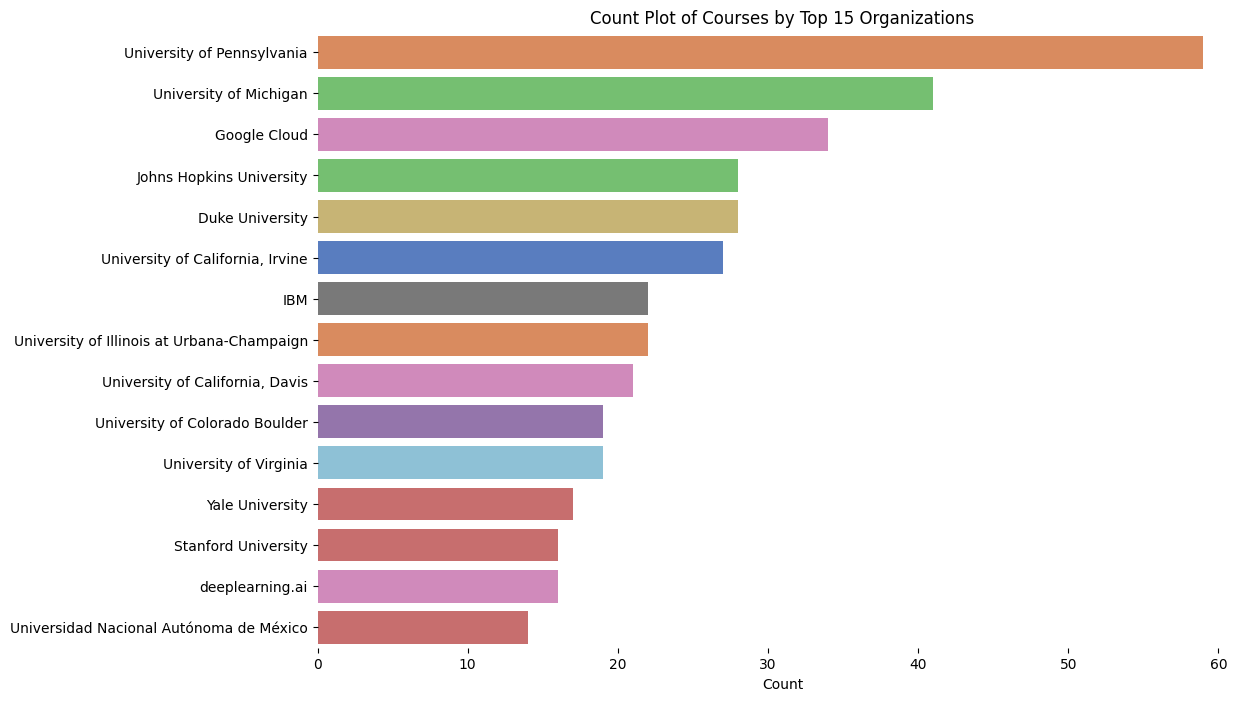

In [17]:
organization_counts = df["course_organization"].value_counts().head(15)

# Creating a count plot for the top 15 organizations
plt.figure(figsize=(12, 8))
sns.countplot(
    y="course_organization",
    data=df,
    order=organization_counts.index,
    hue="course_organization",
    palette="muted",
    # hue="course_Certificate_type",
    dodge=False,
)
plt.title("Count Plot of Courses by Top 15 Organizations")
plt.xlabel("Count")
plt.ylabel("")
# plt.legend()

# Removing the square border
sns.despine(left=True, bottom=True)

plt.show()

**Displaying the counts for the Top 15 organizations**:

In [4]:
organization_counts = df["course_organization"].value_counts().head(15)
organization_counts

course_organization
University of Pennsylvania                    59
University of Michigan                        41
Google Cloud                                  34
Johns Hopkins University                      28
Duke University                               28
University of California, Irvine              27
IBM                                           22
University of Illinois at Urbana-Champaign    22
University of California, Davis               21
University of Colorado Boulder                19
University of Virginia                        19
Yale University                               17
Stanford University                           16
deeplearning.ai                               16
Universidad Nacional Autónoma de México       14
Name: count, dtype: int64

- The top 15 organisations offering the most courses are identified, with the University of Pennsylvania leading with 59 courses.
- Other notable contributors include the University of Michigan (41 courses), Google Cloud (34 courses), and Johns Hopkins University (28 courses).


### Course Certificate Type Analysis

**Analysing the distribution of course certificate types and visualising**

- Calculating the counts for each category in `course_Certificate_type`.
- Sorting the categories based on these counts.
- Reordering the DataFrame based on the sorted categories.
- Creating a count plot for `course_Certificate_type`.

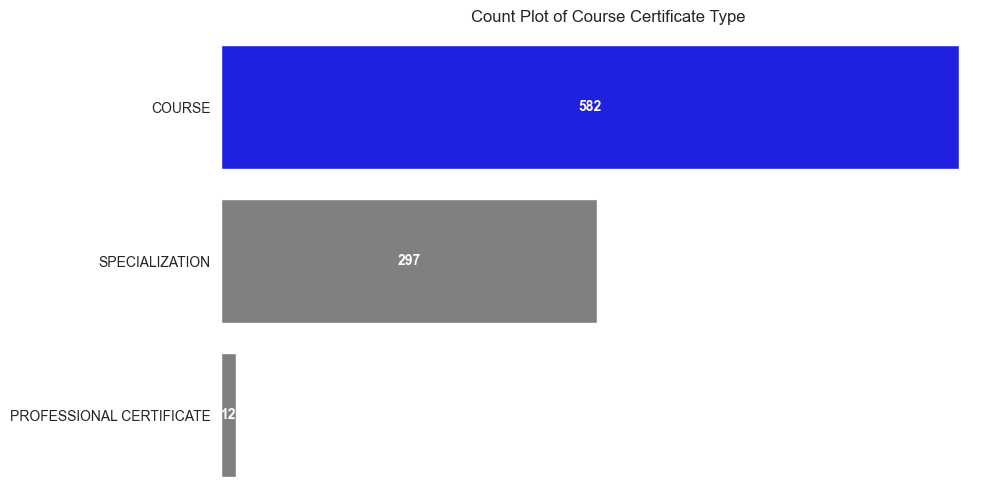

In [5]:
sns.set_style("whitegrid")

certificate_counts = df["course_Certificate_type"].value_counts()
sorted_certificates = certificate_counts.index

# Reordering the DataFrame based on the sorted categories
df["course_Certificate_type"] = pd.Categorical(
    df["course_Certificate_type"], categories=sorted_certificates, ordered=True
)

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    y="course_Certificate_type",
    data=df,
    hue="course_Certificate_type",
    order=sorted_certificates,
    palette=[
        "blue" if x == sorted_certificates[0] else "grey" for x in sorted_certificates
    ],
)
plt.title("Count Plot of Course Certificate Type")
plt.xlabel("")
plt.ylabel("")

# Adding number labels on the bars
for container in ax.containers:
    ax.bar_label(container, label_type="center", color="white", fontweight="bold")

# Removing the X-axis labels and grid lines in the background
ax.set_xticklabels([])
ax.grid(False)

sns.despine(left=True, bottom=True)

plt.show()

- The dataset includes 3 unique certificate types.
- The most common certificate type is "COURSE," with 582 occurrences.

### Course Difficulty Analysis

**Analysing the distribution of course difficulty levels and visualising**

- Calculating the counts for each category in `course_difficulty`.
- Sorting the categories based on these counts.
- Reordering the DataFrame based on the sorted categories.
- Creating a count plot for `course_difficulty`.

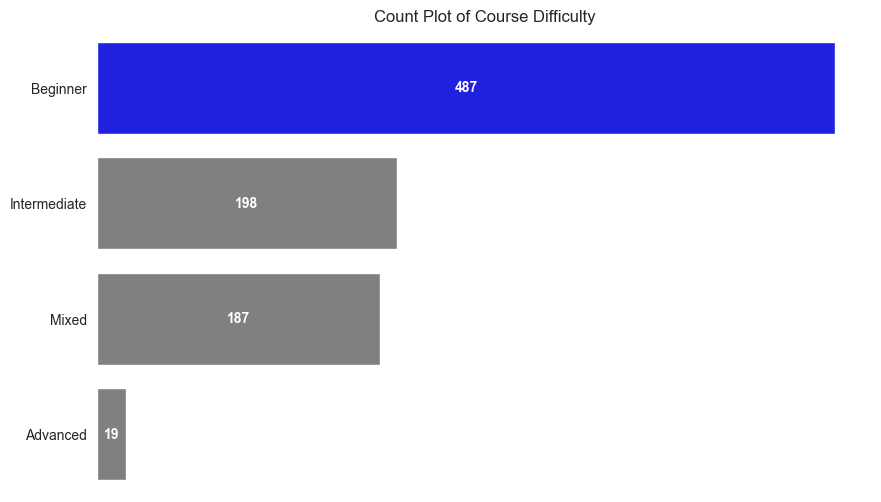

In [7]:
# Creating count plot for course_difficulty

difficulty_counts = df["course_difficulty"].value_counts()

sorted_difficulties = difficulty_counts.index

df["course_difficulty"] = pd.Categorical(
    df["course_difficulty"], categories=sorted_difficulties, ordered=True
)

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    y="course_difficulty",
    data=df,
    hue="course_difficulty",
    order=sorted_difficulties,
    palette=[
        "blue" if x == sorted_difficulties[0] else "grey" for x in sorted_difficulties
    ],
)
plt.title("Count Plot of Course Difficulty")
plt.xlabel("")
plt.ylabel("")


for container in ax.containers:
    ax.bar_label(container, label_type="center", color="white", fontweight="bold")

ax.set_xticklabels([])
ax.grid(False)

sns.despine(left=True, bottom=True)

plt.show()

- The dataset includes 4 unique difficulty levels.
- "Beginner" is the most common difficulty level, with 487 occurrences.
- Other difficulty levels include "Intermediate" (198), "Mixed" (187) and "Advanced" (19).
- It shows that "Advanced" level courses are the least popular in this dataset.

**Calculating the average number of students enrolled for each course difficulty level.**

- Grouping the data by `course_difficulty` and calculating the median of `course_students_enrolled`.
- Creating a bar plot to visualise the average number of students enrolled for each difficulty level.

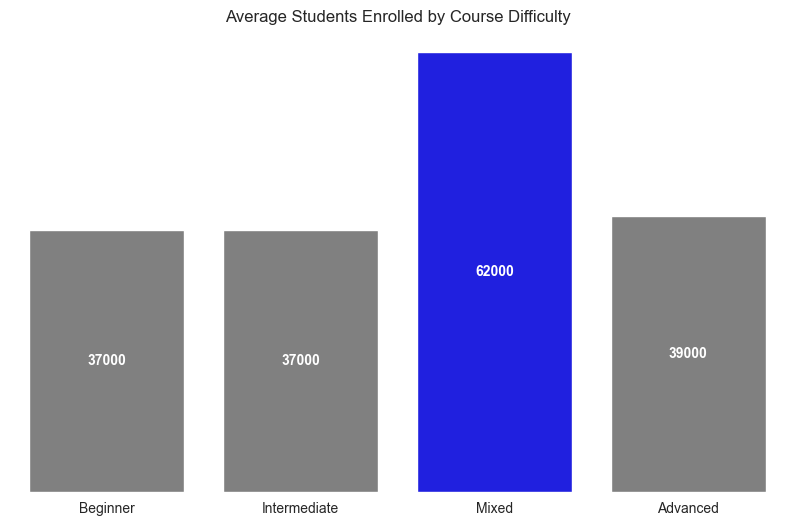

In [4]:
average_enrollment = (
    df.groupby("course_difficulty", observed=False)["course_students_enrolled"]
    .median()
    .reset_index()
    .round(0)
)

# Identifying the highest bar
max_value = average_enrollment["course_students_enrolled"].max()

plt.figure(figsize=(10, 6))
colour_palette = [
    "blue" if value == max_value else "grey"
    for value in average_enrollment["course_students_enrolled"]
]
ax = sns.barplot(
    x="course_difficulty",
    y="course_students_enrolled",
    hue="course_difficulty",
    data=average_enrollment,
    palette=colour_palette,
    legend=False,
)
plt.title("Average Students Enrolled by Course Difficulty")
plt.xlabel("")
plt.ylabel("")

for container in ax.containers:
    ax.bar_label(container, label_type="center", color="white", fontweight="bold")

ax.set_yticklabels([])
ax.grid(False)
ax.set_axisbelow(True)

sns.despine(left=True, bottom=True)

plt.show()

- The highest median enrollment is observed for "Mixed" difficulty courses.
- Other difficulty courses are much closer to each other when based on their median enrollment.

### Course Rating Analysis

**Analysing the Distribution of Course Ratings**

- Determining the number of unique ratings in the dataset.

In [6]:
print(f"The dataset contains {df['course_rating'].nunique()} unique ratings.")

The dataset contains 14 unique ratings.


In [6]:
rating_counts = df["course_rating"].value_counts().sort_index(ascending=False)
rating_counts

course_rating
5.0      2
4.9     68
4.8    256
4.7    251
4.6    168
4.5     80
4.4     34
4.3     15
4.2     10
4.1      1
4.0      2
3.9      2
3.7      1
3.3      1
Name: count, dtype: int64

- The ratings are generally high, with the majority of courses rated between 4.5 and 5.0.
- The most frequent ratings are 4.8 (256 occurrences), 4.7 (251 occurrences) and 4.6 (168 occurrences).

**Creating a histogram and box plot for the distribution of course ratings.**

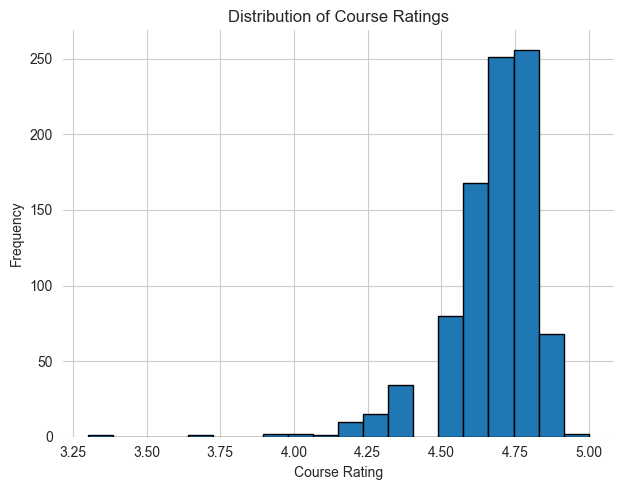

In [5]:
plt.figure(figsize=(12, 5))

# Histogram for course_rating

plt.subplot(1, 2, 1)
plt.hist(df["course_rating"], bins=20, edgecolor="black")
plt.title("Distribution of Course Ratings")
plt.xlabel("Course Rating")
plt.ylabel("Frequency")

plt.tight_layout()

sns.despine(left=True, bottom=True)
plt.show()

In [8]:
median = df["course_rating"].median().round(2)
mean = df["course_rating"].mean().round(2)
mode = df["course_rating"].mode().values

print(f"Mean: {mean}, Median: {median},  Mode: {mode}")
df["course_rating"].describe().round(2)

Mean: 4.68, Median: 4.7,  Mode: [4.8]


count    891.00
mean       4.68
std        0.16
min        3.30
25%        4.60
50%        4.70
75%        4.80
max        5.00
Name: course_rating, dtype: float64

- The histogram indicates a left-skewed distribution, with most courses having high ratings (4.5 to 5.0).
- With a mean of 4.68 and most of the data clustered between 4.6 and 4.8. The outliers on the lower end pull the minimum down to 3.3, but these are rare occurrences compared to the overall dataset.

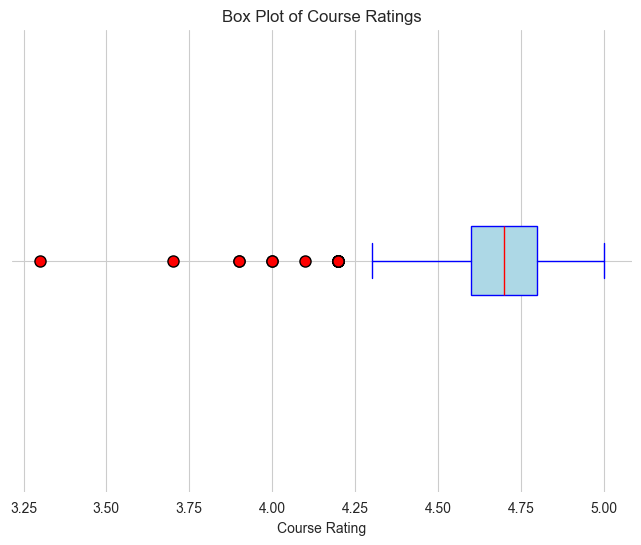

In [59]:
# Box plot for course_rating

plt.figure(figsize=(8, 6))
plt.boxplot(
    df["course_rating"],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
    whiskerprops=dict(color="blue"),
    capprops=dict(color="blue"),
    flierprops=dict(markerfacecolor="red", marker="o", markersize=8, linestyle="none"),
)

plt.title("Box Plot of Course Ratings")
plt.xlabel("Course Rating")
plt.yticks([1], [""])

sns.despine(left=True, bottom=True)
plt.show()

- Left-skewed (negatively skewed): The bulk of the data is concentrated at the higher end of the rating scale (between 4.6 and 4.8), with a median of 4.7. The presence of several lower outliers (from 3.3 to 4.2) creates a tail on the left side of the distribution, indicating left skewness. This means that most courses are rated highly, but there are a few courses with significantly lower ratings.

**Grouping the data by `course_difficulty` and calculating the mean and median course ratings.**

In [43]:
# Grouping by course_difficulty and calculating the mean, median and count course_rating
course_difficulty_grouped = df.groupby("course_difficulty", observed=False)

mean_rating = course_difficulty_grouped["course_rating"].mean()
median_rating = course_difficulty_grouped["course_rating"].median()
count_courses = course_difficulty_grouped["course_rating"].count()

print(f"Mean Course Rating by Difficulty Level:\n{mean_rating}")
print(f"\nMedian Course Rating by Difficulty Level:\n{median_rating}")
print(f"\nCount of Courses by Difficulty Level:\n{count_courses}")

Mean Course Rating by Difficulty Level:
course_difficulty
Beginner        4.680903
Intermediate    4.646465
Mixed           4.708556
Advanced        4.600000
Name: course_rating, dtype: float64

Median Course Rating by Difficulty Level:
course_difficulty
Beginner        4.7
Intermediate    4.7
Mixed           4.8
Advanced        4.7
Name: course_rating, dtype: float64

Count of Courses by Difficulty Level:
course_difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: course_rating, dtype: int64


**Identifying outliers in the course ratings using the IQR method.**

In [24]:
# Identifying outliers using function from outliers function module
course_ratings_outliers = identify_outliers(df["course_rating"]).sort_values(
    ascending=True
)
print(f"Outliers in course_rating:\n{course_ratings_outliers}")

Outliers in course_rating:
413    3.3
566    3.7
873    3.9
569    3.9
598    4.0
522    4.0
414    4.1
445    4.2
515    4.2
844    4.2
402    4.2
331    4.2
590    4.2
182    4.2
640    4.2
676    4.2
59     4.2
Name: course_rating, dtype: float64


**Listing Courses with the Highest Rating (5.0)**:

In [36]:
top_rating_bm = df["course_rating"] == 5
df[top_rating_bm]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500
432,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600



**Listing Courses with the Lowest Ratings (<= 4.1)**:

In [4]:
bottom_rating_bm = df["course_rating"] <= 4.1
df[bottom_rating_bm]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
413,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140000
414,How to Start Your Own Business,Michigan State University,SPECIALIZATION,4.1,Beginner,34000
522,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.0,Intermediate,13000
566,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.7,Intermediate,29000
569,Machine Learning for Trading,Google Cloud,SPECIALIZATION,3.9,Intermediate,15000
598,Mathematics for Machine Learning: PCA,Imperial College London,COURSE,4.0,Intermediate,33000
873,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.9,Intermediate,76000


### Course Students Enrolled Analysis


Analysing the distribution of the number of students enrolled in courses and understanding the relationship between student enrollment and other variables.

**Calculating the Number of Unique Values in `course_students_enrolled`**:

In [29]:
print(f"Unique values of enrolled students: {df['course_students_enrolled'].nunique()}")
print(
    f"\nDescriptive statistics of enrolled students:\n{df['course_students_enrolled'].describe().round(0)}"
)

Unique values of enrolled students: 205

Descriptive statistics of enrolled students:
count        891.0
mean       90552.0
std       181936.0
min         1500.0
25%        17500.0
50%        42000.0
75%        99500.0
max      3200000.0
Name: course_students_enrolled, dtype: float64


- The dataset includes a wide range of enrollments, from 1,500 to 3,200,000 students.

**Checking the Top 5 courses based on students enrolled:**

In [6]:
most_popular_courses = df.sort_values(
    by="course_students_enrolled", ascending=False
).head(5)
most_popular_courses

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000
815,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000
688,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000
674,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000
196,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000


**Creating a Histogram and Box Plot for `course_students_enrolled`**:

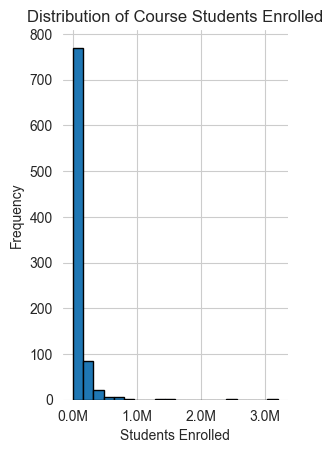

In [12]:
# Histogram for course_students_enrolled

plt.subplot(1, 2, 2)
plt.hist(df["course_students_enrolled"], bins=20, edgecolor="black")
plt.title("Distribution of Course Students Enrolled")
plt.xlabel("Students Enrolled")
plt.ylabel("Frequency")

# Formatting the x-axis to show number in millions
ax = plt.gca()
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: "{:.1f}M".format(x / 1_000_000))
)


sns.despine(left=True, bottom=True)

- The histogram shows a right-skewed distribution, indicating that most courses have a relatively lower number of enrollments, with a few courses having very high enrollments.

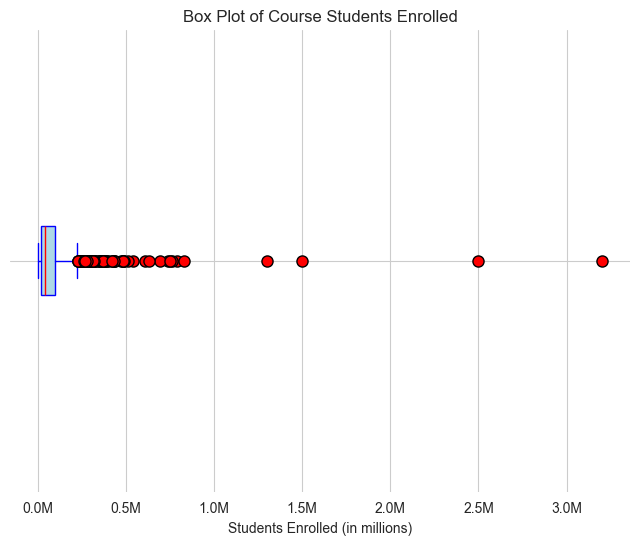

In [14]:
plt.figure(figsize=(8, 6))
plt.boxplot(
    df["course_students_enrolled"],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
    whiskerprops=dict(color="blue"),
    capprops=dict(color="blue"),
    flierprops=dict(markerfacecolor="red", marker="o", markersize=8, linestyle="none"),
)

plt.title("Box Plot of Course Students Enrolled")
plt.xlabel("Students Enrolled (in millions)")
plt.yticks([1], [""])

ax = plt.gca()
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: "{:.1f}M".format(x / 1_000_000))
)

sns.despine(left=True, bottom=True)

plt.show()

**Identifying Outliers in `course_students_enrolled`**:

In [25]:
# Identifying outliers using function from outliers function module
students_enrolled_outliers = identify_outliers(df["course_students_enrolled"])
print(f"Outliers in course_students_enrolled:\n{students_enrolled_outliers}")

Outliers in course_students_enrolled:
4      320000
6      350000
18     540000
27     320000
43     270000
        ...  
816    320000
850    310000
859    280000
864    260000
869    270000
Name: course_students_enrolled, Length: 78, dtype: int64


- These outliers represent courses with exceptionally high enrollments, which could be of particular interest for further analysis.

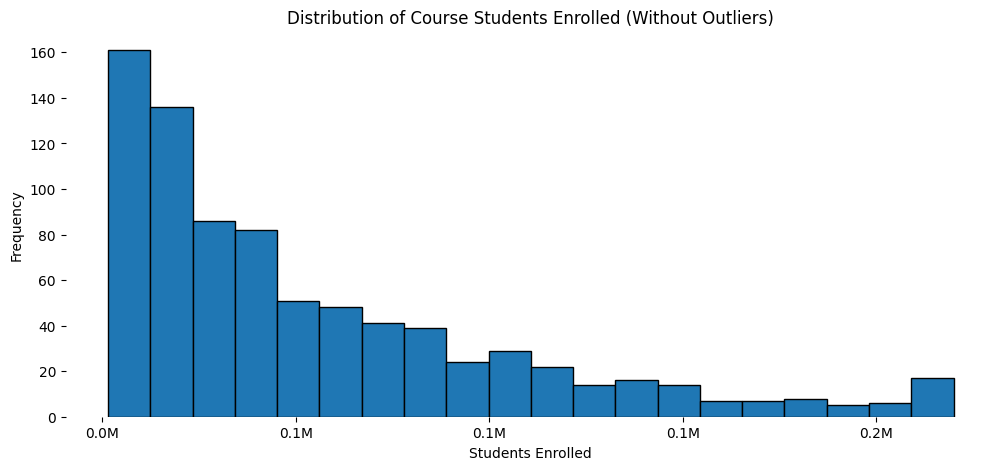

In [26]:
filtered_df = df[~df["course_students_enrolled"].isin(students_enrolled_outliers)]

plt.figure(figsize=(12, 5))
plt.hist(filtered_df["course_students_enrolled"], bins=20, edgecolor="black")
plt.title("Distribution of Course Students Enrolled (Without Outliers)")
plt.xlabel("Students Enrolled")
plt.ylabel("Frequency")

# Formatting the x-axis to show numbers in millions
ax = plt.gca()
ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: "{:.1f}M".format(x / 1_000_000))
)

ax.grid(False)
sns.despine(left=True, bottom=True)

plt.show()

**Calculating the Correlation Between `course_rating` and `course_students_enrolled`**:

In [9]:
numeric_df = df.select_dtypes(include="number")

corr_matrix = numeric_df.corr().round(2)
corr_matrix

,course_rating,course_students_enrolled
course_rating,1.00,0.07
course_students_enrolled,0.07,1.00


**Creating a Scatter Plot for `course_rating` vs. `course_students_enrolled`**:

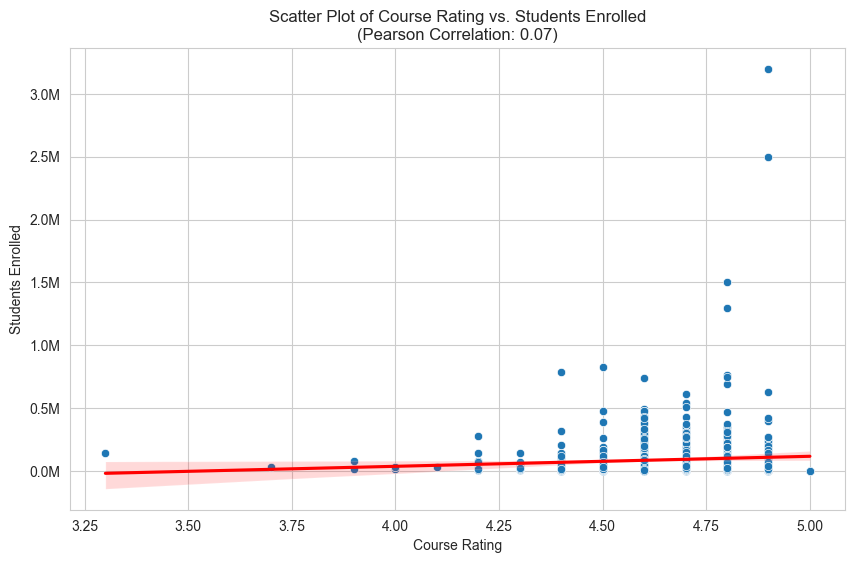

In [34]:
# Calculating the Pearson correlation coefficient
pearson_corr = df[["course_rating", "course_students_enrolled"]].corr().iloc[0, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="course_rating", y="course_students_enrolled", data=df)
sns.regplot(
    x="course_rating", y="course_students_enrolled", data=df, scatter=False, color="red"
)
plt.title(
    f"Scatter Plot of Course Rating vs. Students Enrolled\n(Pearson Correlation: {pearson_corr:.2f})"
)
plt.xlabel("Course Rating")
plt.ylabel("Students Enrolled")

ax = plt.gca()
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: "{:.1f}M".format(x / 1_000_000))
)

plt.show()

## Key Findings

1. **Course Organization Analysis**:
    - The top 15 organisations offering the most courses are led by the University of Pennsylvania with 59 courses, followed by the University of Michigan (41 courses), Google Cloud (34 courses), and Johns Hopkins University (28 courses).
    - This indicates a diverse set of course providers, with the top contributors accounting for a significant portion of the overall course offerings.

2. **Course Certificate Type Analysis**:
   - The dataset includes 3 unique certificate types, with "COURSE" being the most common, accounting for 582 out of the 891 courses.

3. **Course Difficulty Analysis**:
   - The dataset includes 4 unique difficulty levels, with "Beginner" being the most common, accounting for 487 courses.
   - The median number of students enrolled is highest for "Mixed" difficulty courses (62 000), indicating that these courses may be the most popular among learners.

4. **Course Rating Analysis**:
   - The course ratings are generally high, with a mean of 4.68 and a median of 4.7 on a 5-point scale.
   - The distribution of ratings is left-skewed, with most courses rated between 4.6 and 4.8, suggesting a high overall quality of the courses.
   - Outlier courses with ratings below 4.3 were identified, which could be further investigated for potential areas of improvement.

5. **Course Students Enrolled Analysis**:
   - The dataset includes a wide range of enrollments, from 1,500 to 3,200,000 students.
   - The distribution of student enrollments is right-skewed, indicating that most courses have relatively lower enrollments, with a few courses having exceptionally high enrollments.
   - The correlation between course rating and student enrollment is relatively weak (0.07), suggesting that factors other than course rating may play a more significant role in determining student enrollment.


In summary, the exploratory data analysis provides valuable insights into the characteristics of the Coursera Course Dataset, including the diversity of course providers, the distribution of certificate types and difficulty levels, the generally high course ratings, and the wide range of student enrollments. These findings can guide further analysis and help identify areas for potential improvement or focus in the Coursera course offerings.